In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2 as cv 
import numpy as np

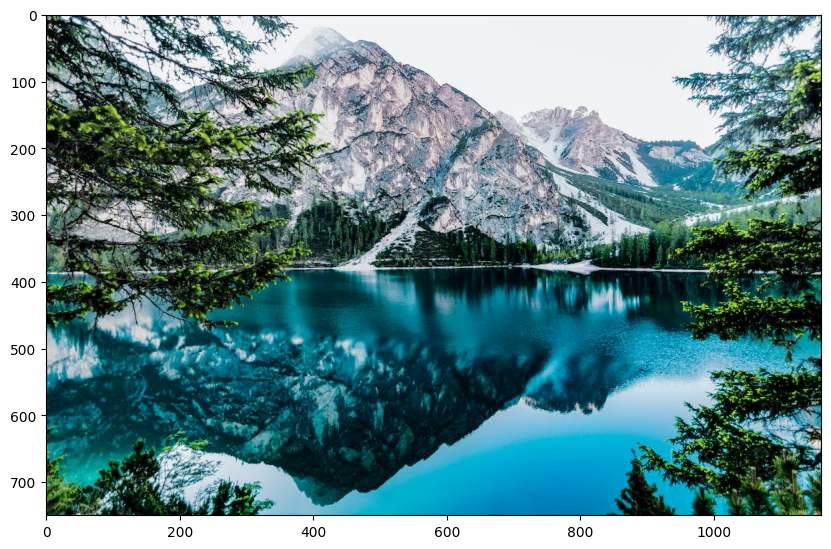

In [3]:
img = cv.imread("11.jpeg")
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

we use the id function to find the object's memory address; we see it is the same as the original array.

In [4]:
A= img
id(A)==id(img)
id(A)

2304614468752

In [5]:
B=img.copy()
id(B)==id(img)

False

In [6]:
img[:,:,]=0

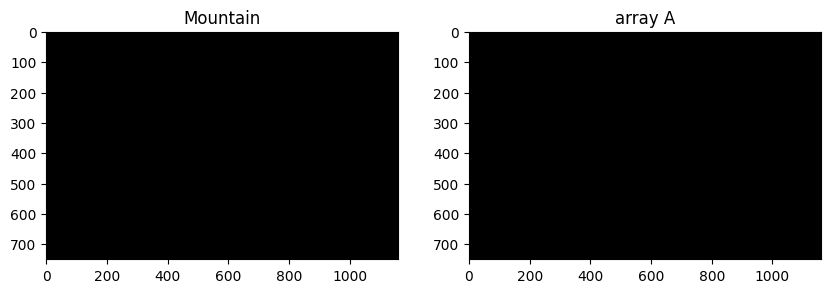

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Mountain")
plt.subplot(122)
plt.imshow(cv.cvtColor(A, cv.COLOR_BGR2RGB))
plt.title("array A")
plt.show()

We see they are the same, this is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable because variables are just names that store references to values. We can also compare baboon and array B:

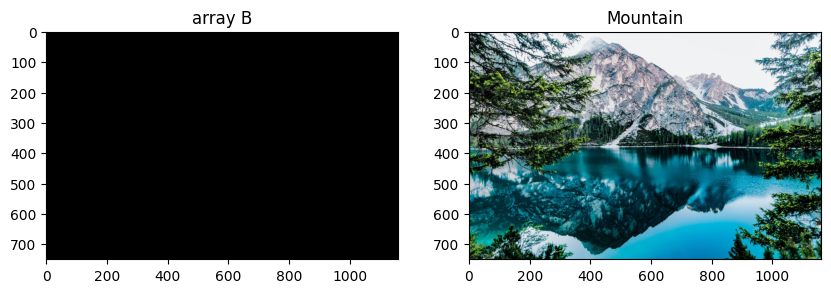

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("array B")
plt.subplot(122)
plt.imshow(cv.cvtColor(B,cv.COLOR_BGR2RGB))
plt.title("Mountain")
plt.show()

They are different because the method copy is used.

FLIPING IMAGES 

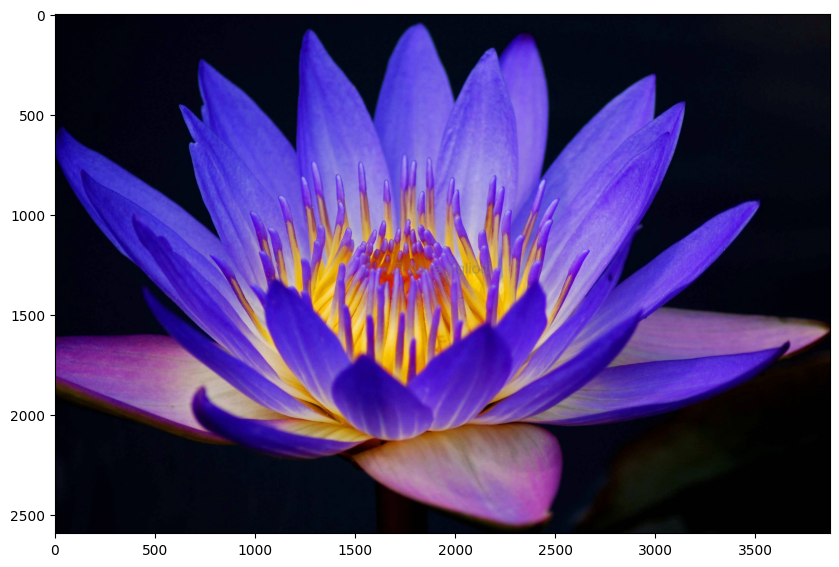

In [9]:
image = cv.imread("flower.jpeg")
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

In [10]:
width, height,C=image.shape
print('width, height,C',width, height,C)

width, height,C 2592 3872 3


In [11]:
array_flip = np.zeros((width, height, C),dtype=np.uint8)

In [12]:
for i, row in enumerate(image):
    array_flip[width-1-i,:,:]=row

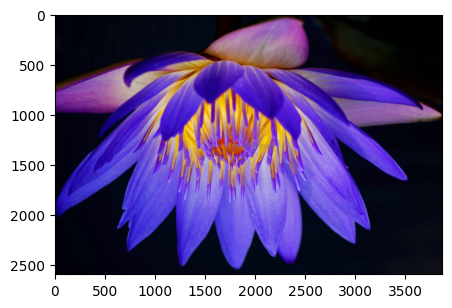

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(array_flip, cv.COLOR_BGR2RGB))
plt.show()

OpenCVhas several ways to flip an image, we can use the flip() function; we have the input image array. The parameter is the flipCode

is the value indicating what kind of flip we would like to perform;

flipcode = 0: flip vertically around the x-axis
    
flipcode > 0: flip horizontally around y-axis positive value
    
flipcode< 0: flip vertically and horizontally, flipping around both axes negative value

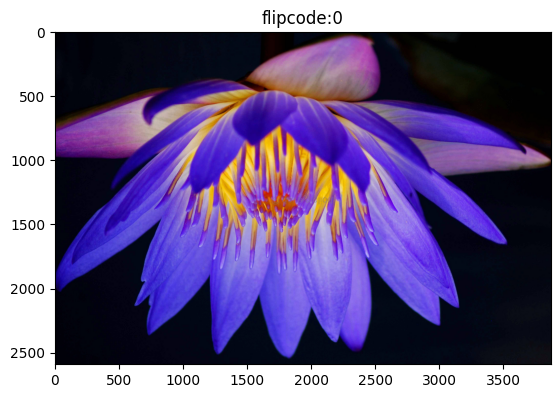

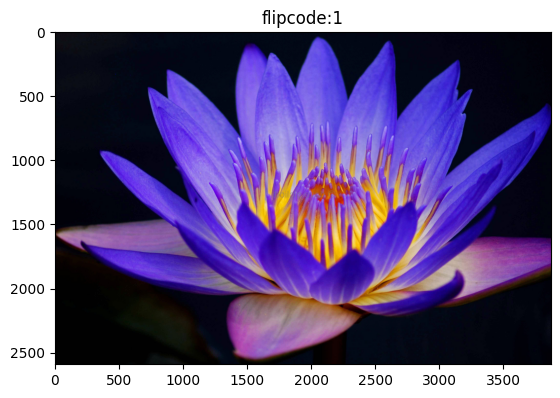

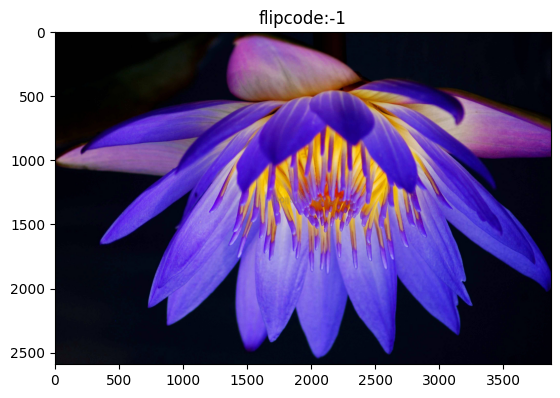

In [14]:
for flipcode in [0,1,-1]:
    im_flip = cv.flip(image,flipcode)
    plt.imshow(cv.cvtColor(im_flip, cv.COLOR_BGR2RGB))
    plt.title("flipcode:"+str(flipcode))
    plt.show()

Use of the rotate() function. The parameter is an integer indicating what kind of flip we would like to perform

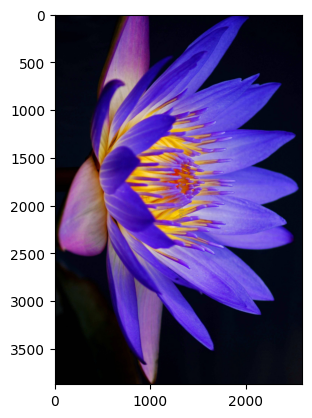

In [15]:
im_flip = cv.rotate(image,0)
plt.imshow(cv.cvtColor(im_flip, cv.COLOR_BGR2RGB))
plt.show()

In [16]:
flip = {"ROTATE_90_CLOCKWISE":cv.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv.ROTATE_180}

In [17]:
flip["ROTATE_90_CLOCKWISE"]

0

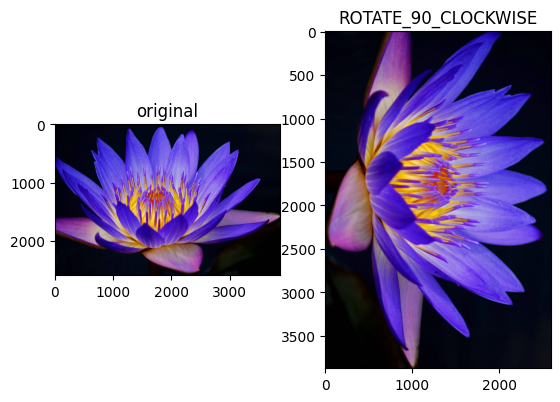

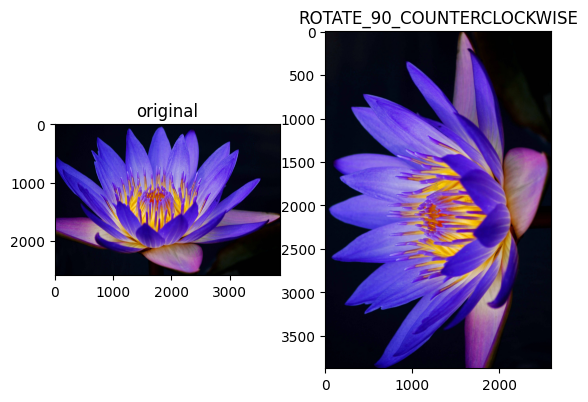

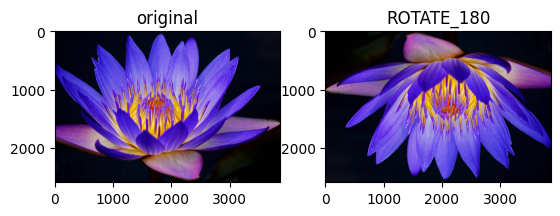

In [18]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title("original")
    plt.subplot(1,2,2)
    plt.imshow(cv.cvtColor(cv.rotate(image,value),cv.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

CROPPING AN IMAGE 

Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable upper is the first row that we would like to include in the image, the variable lower is the last row we would like to include. We then use slicing to obtain the new image.

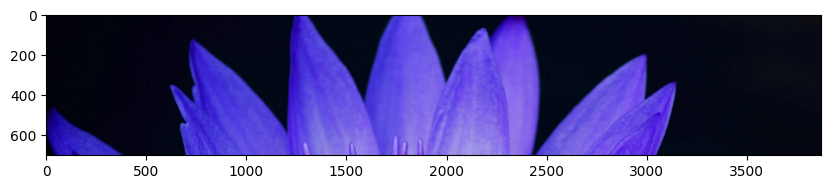

In [19]:
upper = 100
lower = 800
crop_top = image[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(crop_top, cv.COLOR_BGR2RGB))
plt.show()

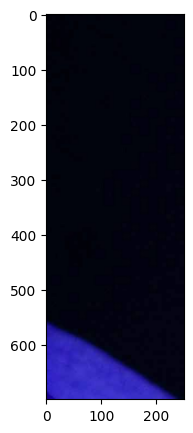

In [20]:
left= 150
right = 400
crop_horizontal = crop_top[:,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(crop_horizontal, cv.COLOR_BGR2RGB))
plt.show()

........................................................................

CHANGING SPECIFIC IMAGE PIXELS

In [21]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] =0

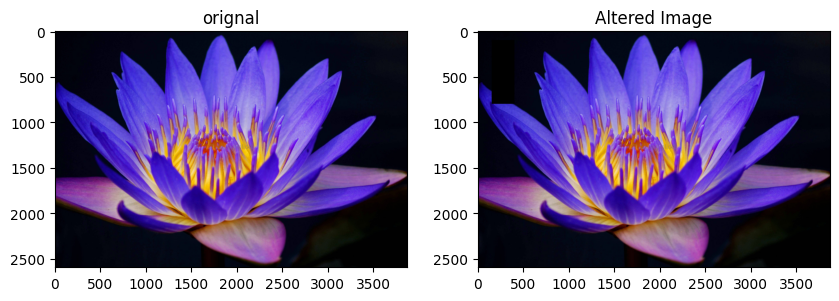

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(array_sq,cv.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

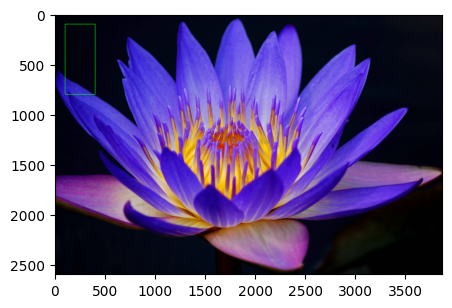

In [23]:
start_point, end_point = (100,100),(right, lower)
image_draw = np.copy(image)
cv.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) 
plt.figure(figsize=(5,5))
plt.imshow(cv.cvtColor(image_draw, cv.COLOR_BGR2RGB))
plt.show()

We can overlay text on an image using the function putText with the following parameter values:

img: Image array
    
text: Text string to be overlayed 
    
org: Bottom-left corner of the text string in the image
    
fontFace: tye type of font
    
fontScale: Font scale
    
color: Text color
    
thickness: Thickness of the lines used to draw a text
    
lineType: Line type
    

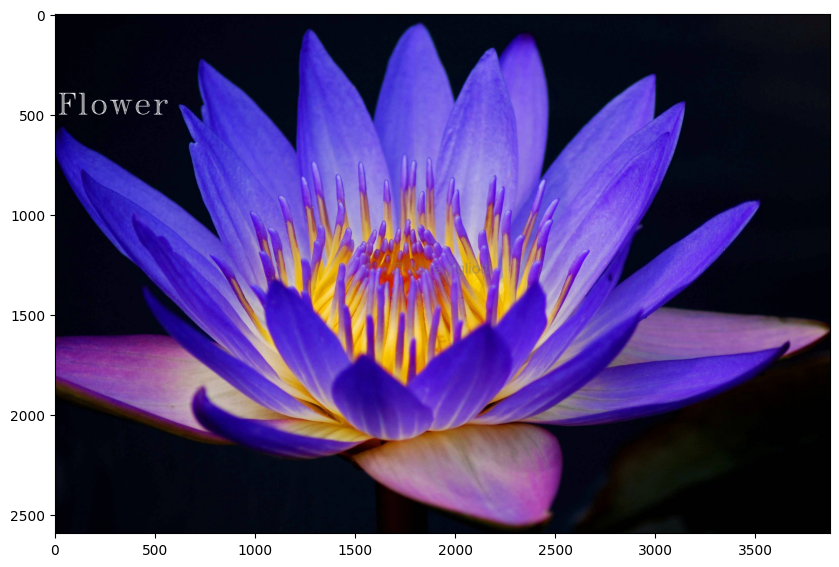

In [24]:
image_draw=cv.putText(img=image,text='Flower',org=(10,500),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(image_draw,cv.COLOR_BGR2RGB))
plt.show()